In [1]:
# The first dataset represents the probability of automation of jobs in the United States
# The second dataset represents the mean salary of jobs in the United States

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# colors variables
c_low_risk = 'yellowgreen'
c_mid_risk = 'gold'
c_high_risk = 'lightcoral'
colors = ['yellowgreen', 'gold', 'lightcoral']

In [3]:
# load automated jobs csv
automated_jobs = pd.read_csv('raw_state_automation_data2.csv')
automated_jobs.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,560,5460,5890,3650,280,6320,5910,980,3740,160
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,3730,44400,168610,36200,2760,52380,43760,10200,32350,4840
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,0,670,1210,380,40,240,640,40,200,0
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,60,3400,9570,2320,380,3840,5830,260,2980,30
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,300,8890,22310,3360,480,5360,7390,600,5730,180


In [4]:
# load salary data for USA

salary_usa_total = pd.read_csv("national_M2018_dl_work_in_progress.csv")
salary_usa_total.head(5)

,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,H_MEAN,A_MEAN,MEAN_PRSE,H_PCT10,H_PCT25,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,27-2011,Actors,detailed,"47,430",7.1,29.34,NaN,4.1,9.05,10.96,17.54,28.41,61.74,NaN,NaN,NaN,NaN,NaN,NaN,True
1,27-2031,Dancers,detailed,"9,720",7.4,20.70,NaN,3.0,9.35,10.98,16.31,26.29,40.08,NaN,NaN,NaN,NaN,NaN,NaN,True
2,27-2040,"Musicians, Singers, and Related Workers",broad,"53,840",2.8,35.53,NaN,2.3,10.40,15.69,26.84,45.55,68.43,NaN,NaN,NaN,NaN,NaN,NaN,True
3,27-2042,Musicians and Singers,detailed,"41,680",3.4,37.51,NaN,2.5,10.40,15.97,28.15,49.25,73.34,NaN,NaN,NaN,NaN,NaN,NaN,True
4,27-2090,"Miscellaneous Entertainers and Performers, Spo...",broad,"13,740",9.3,21.53,NaN,5.0,8.62,10.51,15.94,24.53,42.47,NaN,NaN,NaN,NaN,NaN,NaN,True


In [5]:
# set index of automated jobs
automated_jobs.set_index(['SOC'])

# rename column occ_code to soc for data merge
salary_usa_total = salary_usa_total.rename(columns={'OCC_CODE': 'SOC'})

In [6]:
# filter only soc id and a_mean columns in the salary_usa_total dataset
salary_usa_total = salary_usa_total[['SOC', 'A_MEAN']]
salary_usa_total.head(5)

,SOC,A_MEAN
0,27-2011,NaN
1,27-2031,NaN
2,27-2040,NaN
3,27-2042,NaN
4,27-2090,NaN


In [7]:
# drop NaN from salary_usa_total
salary_usa_total = salary_usa_total.dropna(subset=['A_MEAN'])
salary_usa_total.head(5)

,SOC,A_MEAN
6,29-1061,"267,020"
7,29-1067,"255,110"
8,29-1022,"242,370"
9,29-1064,"238,320"
10,29-1023,"225,760"


In [8]:
# convert a_mean to int
salary_usa_total['A_MEAN'] = salary_usa_total['A_MEAN'].str.replace(',', '').astype('int32')
salary_usa_total.dtypes

SOC       object
A_MEAN     int32
dtype: object

In [9]:
# calculate mean of A_MEAN
salary_usa_total.mean()

A_MEAN    60258.849235
dtype: float64

In [10]:
# merge the 2 datasets - automated jobs and salary data for USA
merged_salary_and_jobs = pd.merge(automated_jobs, salary_usa_total, on='SOC')
merged_salary_and_jobs.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,5460,5890,3650,280,6320,5910,980,3740,160,200140
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,44400,168610,36200,2760,52380,43760,10200,32350,4840,123880
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,670,1210,380,40,240,640,40,200,0,133090
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,3400,9570,2320,380,3840,5830,260,2980,30,147240
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,8890,22310,3360,480,5360,7390,600,5730,180,140320


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11325e0b8>]],
      dtype=object)

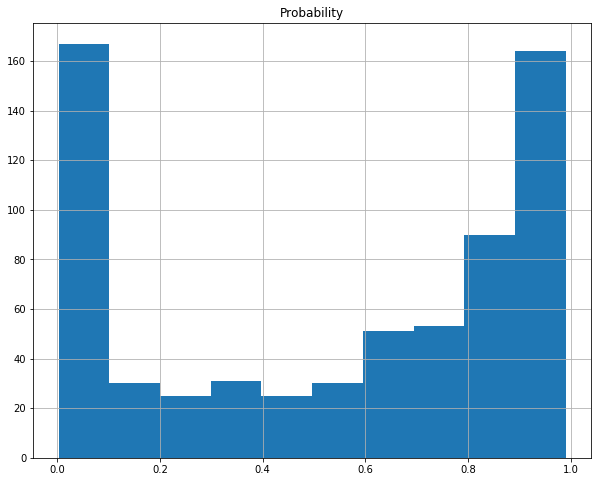

In [11]:
#histogram for all jobs - low, medium and high risk - as per probability
plt.rcParams['figure.figsize'] = [10, 8]

merged_salary_and_jobs.hist('Probability', bins=10)


# plt.savefig('hist_all_risks.png')

In [12]:
# calculate sum of all employees in the States per occupation
total = merged_salary_and_jobs.drop(columns=['SOC', 'Occupation', 'Probability', 'A_MEAN'])

total['Sum_people'] = total.sum(axis=1)
total.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Sum_people
0,1030,760,5750,2710,31150,880,1410,340,2840,14120,...,5460,5890,3650,280,6320,5910,980,3740,160,223270
1,26930,6490,43300,20680,261780,41540,33280,4080,26610,77340,...,44400,168610,36200,2760,52380,43760,10200,32350,4840,2188870
2,50,40,470,110,3760,480,300,0,220,750,...,670,1210,380,40,240,640,40,200,0,28080
3,530,200,4790,1090,33390,3060,4970,590,1280,7600,...,3400,9570,2320,380,3840,5830,260,2980,30,205900
4,2510,400,10650,2650,69180,4570,7040,860,1180,13560,...,8890,22310,3360,480,5360,7390,600,5730,180,365250


In [13]:
# add sum to dataset
merged_salary_and_jobs['sum_people'] = total['Sum_people']
merged_salary_and_jobs.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,5890,3650,280,6320,5910,980,3740,160,200140,223270
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,168610,36200,2760,52380,43760,10200,32350,4840,123880,2188870
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,1210,380,40,240,640,40,200,0,133090,28080
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,9570,2320,380,3840,5830,260,2980,30,147240,205900
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,22310,3360,480,5360,7390,600,5730,180,140320,365250


In [14]:
# function to add new column based on the probability of automation
def add_column(row):
    if row['Probability'] < 0.3:
        val = 'Low Risk'
    elif row['Probability'] >= 0.3 and row['Probability'] < 0.7:
        val = 'Medium Risk'
    else:
        val = 'High Risk'
    return val

In [15]:
# add the new column to the merged_salary_and_jobs dataset
merged_salary_and_jobs['risk_groups'] = merged_salary_and_jobs.apply(add_column, axis=1)

In [16]:
merged_salary_and_jobs.tail()

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people,risk_groups
661,53-7072,Pump Operators; Except Wellhead Pumpers,0.90,0,0,0,0,1130,190,0,...,0,0,0,0,110,80,0,47510,10920,High Risk
662,53-7073,Wellhead Pumpers,0.84,0,0,0,180,220,600,0,...,90,0,0,0,550,0,550,53870,11470,High Risk
663,53-7081,Refuse and Recyclable Material Collectors,0.93,2070,210,1980,1530,13850,1710,910,...,710,480,3430,1890,970,2140,230,40560,114650,High Risk
664,53-7111,Mine Shuttle Car Operators,0.37,50,0,0,0,0,70,0,...,0,0,0,0,510,0,0,56150,1370,Medium Risk
665,53-7121,Tank Car; Truck; and Ship Loaders,0.72,600,80,110,50,360,80,0,...,0,0,180,350,0,190,80,42330,10480,High Risk


In [17]:
# dataset with jobs in low risk of automation - 0 to 0.3
low_risk = merged_salary_and_jobs[merged_salary_and_jobs['Probability'] < 0.3]
low_risk.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people,risk_groups
0,11-1011,Chief Executives,0.015,1030,760,5750,2710,31150,880,1410,...,3650,280,6320,5910,980,3740,160,200140,223270,Low Risk
1,11-1021,General and Operations Managers,0.160,26930,6490,43300,20680,261780,41540,33280,...,36200,2760,52380,43760,10200,32350,4840,123880,2188870,Low Risk
2,11-2011,Advertising and Promotions Managers,0.039,50,40,470,110,3760,480,300,...,380,40,240,640,40,200,0,133090,28080,Low Risk
3,11-2021,Marketing Managers,0.014,530,200,4790,1090,33390,3060,4970,...,2320,380,3840,5830,260,2980,30,147240,205900,Low Risk
4,11-2022,Sales Managers,0.013,2510,400,10650,2650,69180,4570,7040,...,3360,480,5360,7390,600,5730,180,140320,365250,Low Risk


In [18]:
# dataset with jobs in medium risk of automation - 0.3 to 0.7
mid_risk = merged_salary_and_jobs[ (merged_salary_and_jobs['Probability'] >= 0.3) & (merged_salary_and_jobs['Probability'] < 0.7)]
mid_risk.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people,risk_groups
11,11-3071,Transportation; Storage; and Distribution Mana...,0.59,610,550,2320,1290,16300,1170,1160,...,1550,130,2030,2190,460,2710,160,102850,113260,Medium Risk
35,13-1051,Cost Estimators,0.57,2180,320,5250,1140,26570,4690,2280,...,2470,350,9150,5900,780,5180,260,69710,214590,Medium Risk
40,13-1141,Compensation; Benefits; and Job Analysis Speci...,0.47,590,160,1880,660,10650,1140,1070,...,510,190,2340,1720,260,1450,60,67910,79200,Medium Risk
42,13-1161,Market Research Analysts and Marketing Special...,0.61,3110,450,10180,3170,91340,14740,7220,...,6250,1520,18500,16230,830,11210,350,70960,547820,Medium Risk
49,13-2052,Personal Financial Advisors,0.58,2060,130,3890,910,24580,3950,4300,...,1920,350,4560,3890,460,4370,200,121770,201120,Medium Risk


In [19]:
# only show jobs that are high risk of automation
high_risk = merged_salary_and_jobs[merged_salary_and_jobs['Probability'] >= 0.7]
high_risk = high_risk.sort_values(['Probability'], ascending=False)
high_risk.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people,risk_groups
163,23-2093,Title Examiners; Abstractors; and Searchers,0.99,270,110,770,620,5340,0,110,...,580,0,980,1390,260,770,170,51380,51810,High Risk
50,13-2053,Insurance Underwriters,0.99,960,120,1470,200,7440,1390,3160,...,460,190,2280,1970,170,2290,90,76880,90310,High Risk
568,51-6051,Sewers; Hand,0.99,110,0,0,0,1820,0,0,...,0,0,50,30,0,0,0,29510,5170,High Risk
355,41-9041,Telemarketers,0.99,2240,0,13850,2600,13670,6100,1120,...,4750,70,8120,2440,1100,5020,0,28550,214570,High Risk
180,25-4031,Library Technicians,0.99,830,260,1430,400,10190,2460,1650,...,560,550,2290,2870,320,2520,440,36080,93400,High Risk


In [20]:
# amount of jobs in low risk of automation
count_low = len(low_risk)
print(count_low)

222


In [21]:
# amount of jobs in medium risk of automation
count_mid = len(mid_risk)
print(count_mid)

137


In [22]:
# amount of jobs in high risk of automation
count_high = len(high_risk)
print(count_high)

307


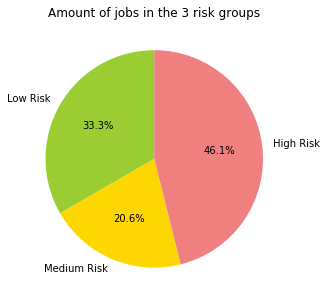

In [23]:
# create a pie chart showing all 3 risk groups:
plt.rcParams['figure.figsize'] = [5, 5]

# Data to plot
labels = ['Low Risk', 'Medium Risk', 'High Risk']
sizes = [count_low, count_mid, count_high]


# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, 
        startangle=90)

# add title
plt.title('Amount of jobs in the 3 risk groups')
print('')


# plt.savefig('pie_all_risks.png')

In [24]:
high_risk.describe()

,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,3.070000e+02
mean,0.884593,2996.547231,466.188925,3779.771987,1829.706840,23081.465798,3549.022801,2222.573290,627.166124,656.221498,...,18357.980456,1964.788274,438.403909,5100.065147,4361.335505,1071.205212,4313.811075,431.400651,43517.915309,2.058038e+05
std,0.080668,8036.980650,1180.498179,9920.920341,4909.081179,56844.945678,9547.722020,5828.301826,1753.958580,1942.747546,...,47520.838358,5083.783285,1163.777259,14077.505396,11172.905713,3024.925351,11088.558261,1070.875120,14934.577971,5.249512e+05
min,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22140.000000,0.000000e+00
25%,0.830000,200.000000,0.000000,130.000000,85.000000,1520.000000,100.000000,50.000000,0.000000,0.000000,...,1220.000000,70.000000,0.000000,185.000000,305.000000,0.000000,200.000000,0.000000,33470.000000,1.463500e+04
50%,0.900000,670.000000,70.000000,660.000000,400.000000,4550.000000,620.000000,370.000000,70.000000,0.000000,...,4000.000000,390.000000,70.000000,980.000000,890.000000,210.000000,760.000000,80.000000,40890.000000,4.263000e+04
75%,0.950000,2275.000000,350.000000,2560.000000,1335.000000,17470.000000,2395.000000,1525.000000,435.000000,305.000000,...,12165.000000,1575.000000,335.000000,3460.000000,3385.000000,730.000000,3380.000000,295.000000,50030.000000,1.456200e+05
max,0.990000,72610.000000,10470.000000,90030.000000,37840.000000,440440.000000,83670.000000,51540.000000,17750.000000,15140.000000,...,383080.000000,43450.000000,9700.000000,122290.000000,101850.000000,24630.000000,85100.000000,8580.000000,132860.000000,4.528570e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1136a5a20>]],
      dtype=object)

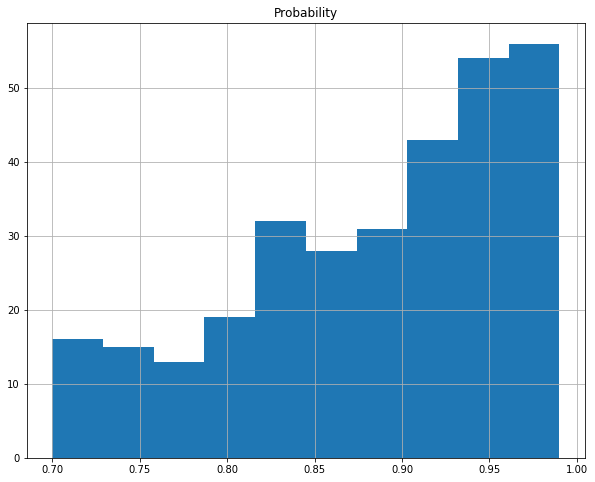

In [25]:
# histogram for the high risk jobs only
plt.rcParams['figure.figsize'] = [10, 8]

high_risk.hist('Probability', bins=10)

# plt.savefig('hist_high_risk.png')

In [26]:
# look at an occupation by its SOC
high_risk[ (high_risk.SOC == '13-2053') ]

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people,risk_groups
50,13-2053,Insurance Underwriters,0.99,960,120,1470,200,7440,1390,3160,...,460,190,2280,1970,170,2290,90,76880,90310,High Risk


Text(0.5, 1.0, 'Jobs with high probability of automation')

//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65430 missing from current font.
  font.set_text(s, 0.0, flags=flags)
//anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65430 missing from current font.
  font.set_text(s, 0, flags=flags)


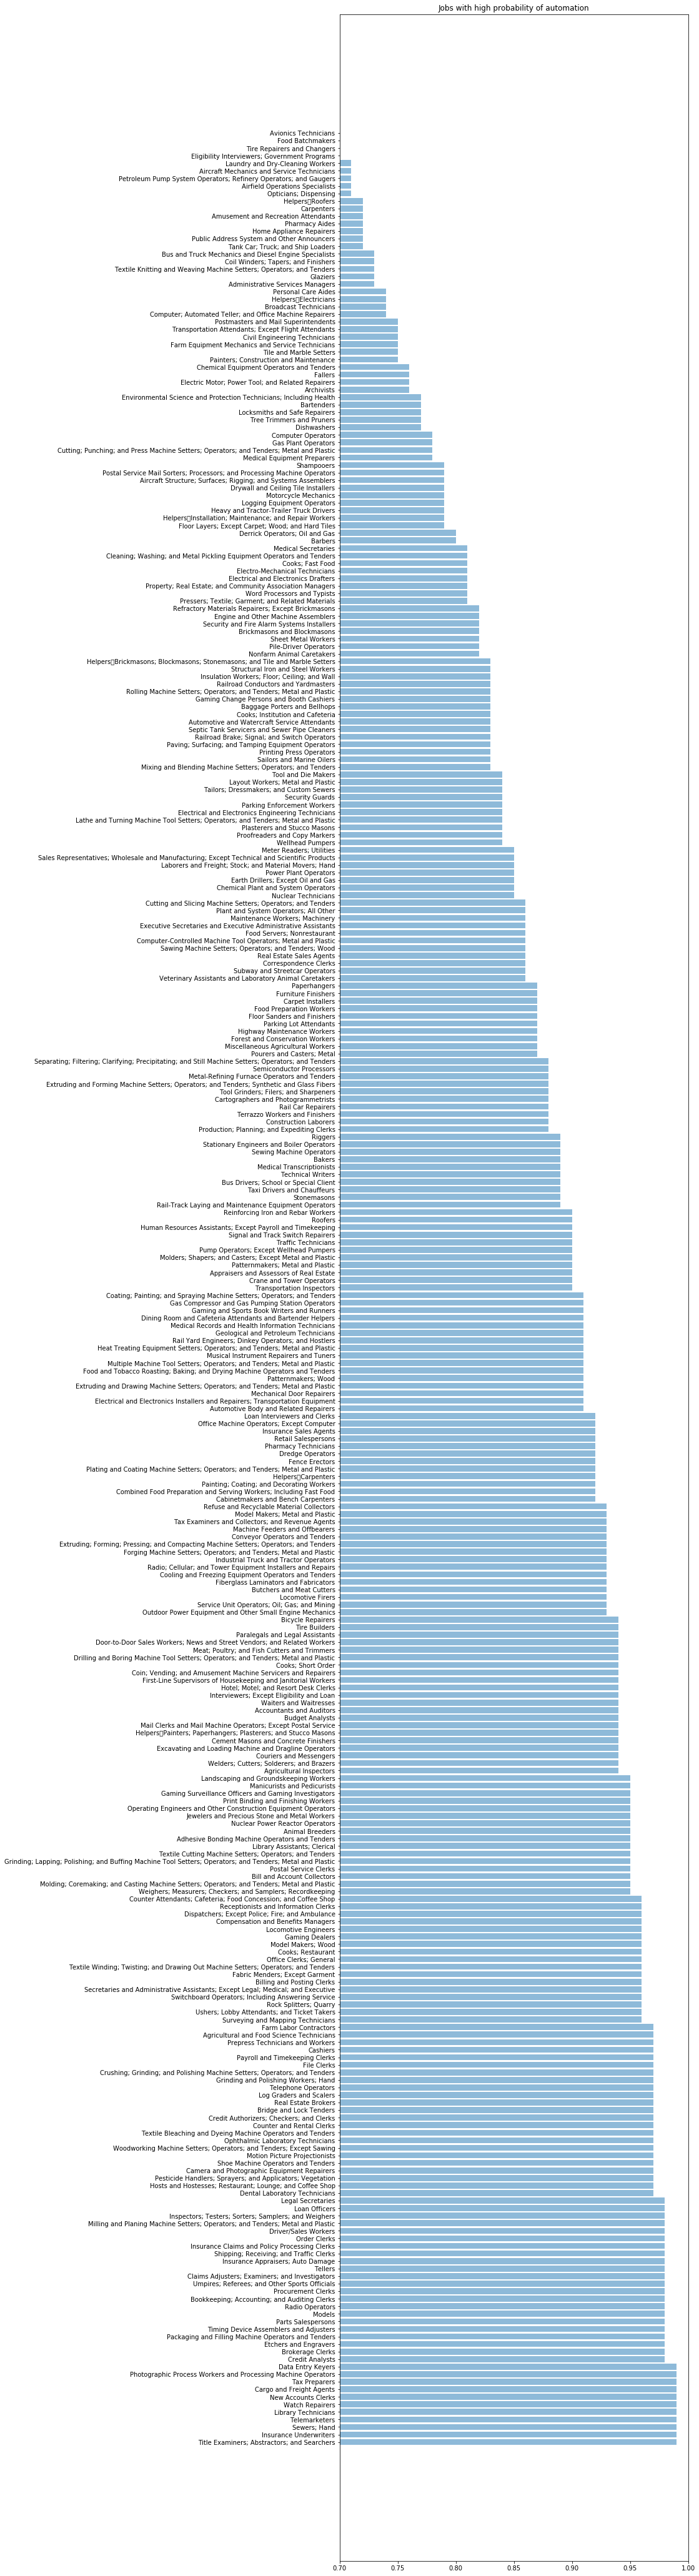

In [27]:
# bar chart with all high risk jobs
plt.rcParams['figure.figsize'] = [10, 75]

plt.barh( high_risk['Occupation'], high_risk['Probability'], align='center', alpha=0.5 )

plt.xlim(left=0.7, right=1)
# add title
plt.title('Jobs with high probability of automation')


# plt.savefig('bar_h_high_risk.png')

In [28]:
# sum the people in states
states = high_risk.drop(columns=['SOC', 'Occupation', 'Probability', 'A_MEAN'])

states['Sum_people'] = states.sum(axis=1)

In [29]:
# add sum to dataset
high_risk['sum_people'] = states['Sum_people']
high_risk.head(5)

,SOC,Occupation,Probability,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,A_MEAN,sum_people,risk_groups
163,23-2093,Title Examiners; Abstractors; and Searchers,0.99,270,110,770,620,5340,0,110,...,580,0,980,1390,260,770,170,51380,103620,High Risk
50,13-2053,Insurance Underwriters,0.99,960,120,1470,200,7440,1390,3160,...,460,190,2280,1970,170,2290,90,76880,180620,High Risk
568,51-6051,Sewers; Hand,0.99,110,0,0,0,1820,0,0,...,0,0,50,30,0,0,0,29510,10340,High Risk
355,41-9041,Telemarketers,0.99,2240,0,13850,2600,13670,6100,1120,...,4750,70,8120,2440,1100,5020,0,28550,429140,High Risk
180,25-4031,Library Technicians,0.99,830,260,1430,400,10190,2460,1650,...,560,550,2290,2870,320,2520,440,36080,186800,High Risk


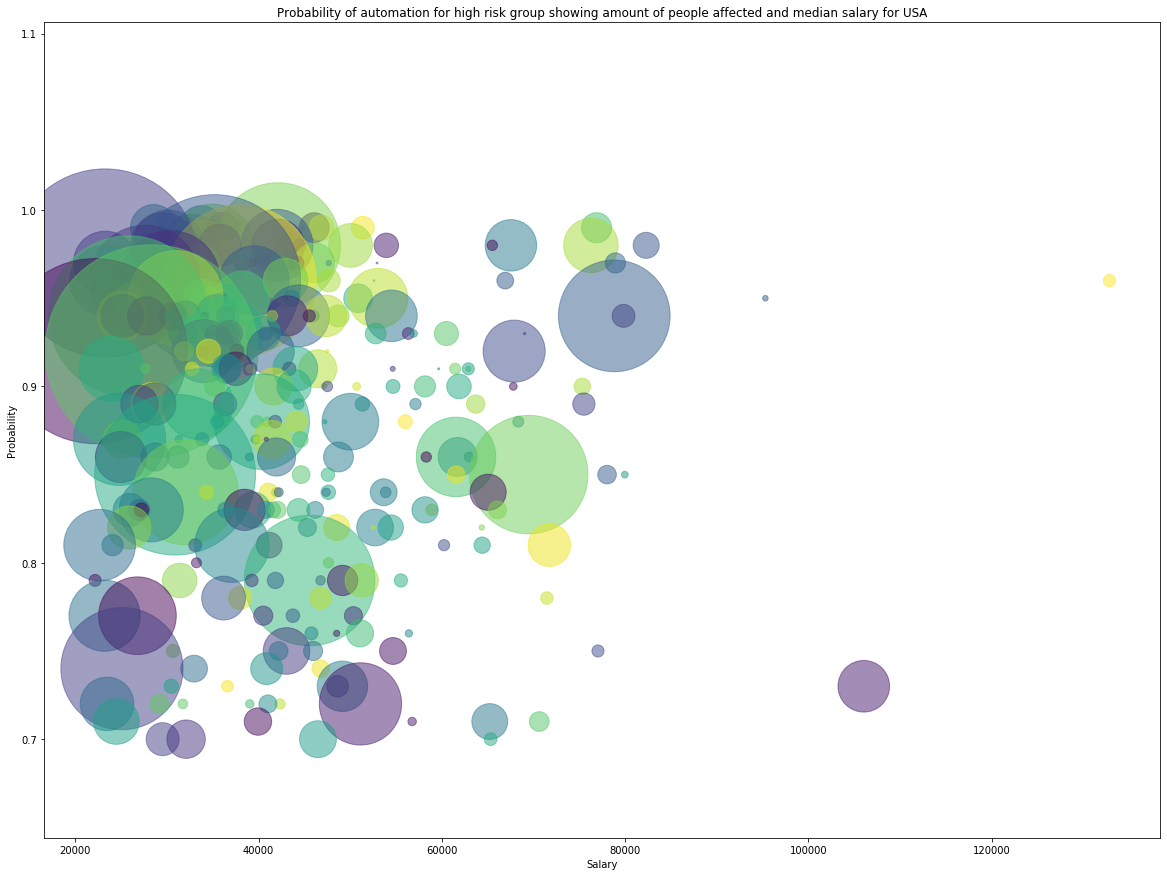

In [30]:
# scatter plot

colors = np.random.rand(307)

plt.rcParams['figure.figsize'] = [20, 15]

plt.scatter( high_risk['A_MEAN'], high_risk['Probability'], s=high_risk['sum_people'] / 200, c=colors, alpha=0.5 )

plt.xlabel('Salary')
plt.ylabel('Probability')
plt.title('Probability of automation for high risk group showing amount of people affected and median salary for USA')
print('')


# plt.savefig('scatter_high_risk.png')

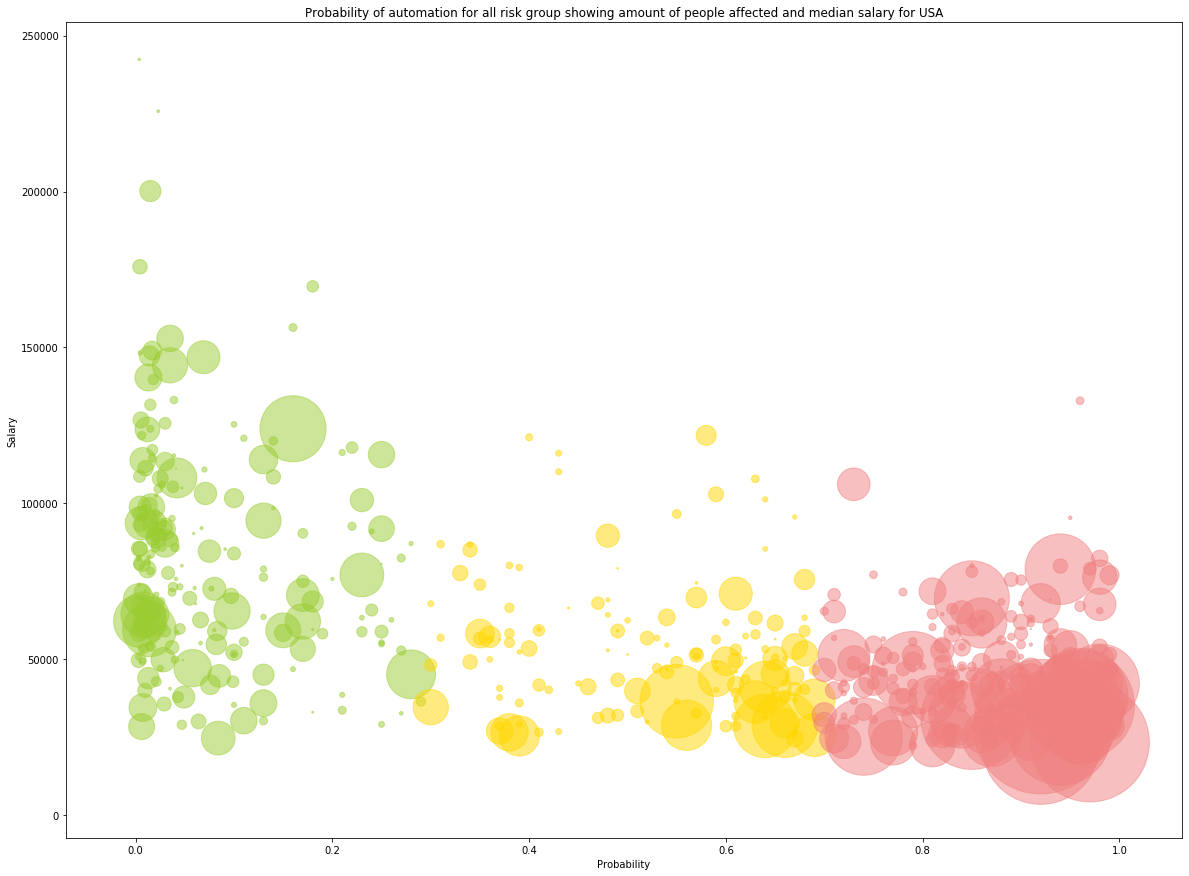

In [31]:
# How many people may lose their jobs (all probabilities - color coded)

plt.rcParams['figure.figsize'] = [20, 15]
#colors = np.random.rand(307)
plt.scatter( low_risk['Probability'], low_risk['A_MEAN'], s=low_risk['sum_people'] / 500, color=c_low_risk, alpha=0.5 )
plt.scatter( mid_risk['Probability'], mid_risk['A_MEAN'], s=mid_risk['sum_people'] / 500, color=c_mid_risk, alpha=0.5 )
plt.scatter( high_risk['Probability'], high_risk['A_MEAN'], s=high_risk['sum_people'] / 500, color=c_high_risk, alpha=0.5 )

plt.xlabel('Probability')
plt.ylabel('Salary')
plt.title('Probability of automation for all risk group showing amount of people affected and median salary for USA')
print('')

# plt.savefig('scatter_all_risks.png')

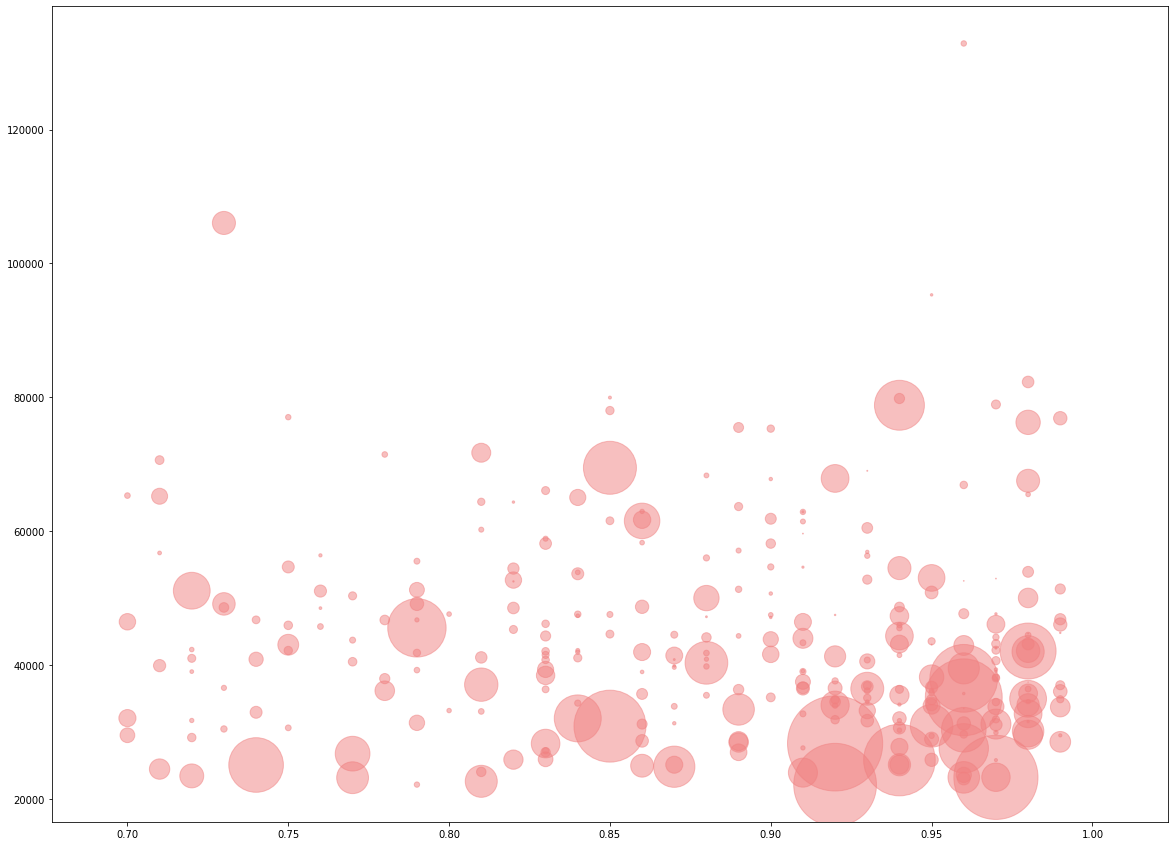

In [32]:
# How many people may lose their jobs? (high probability)
plt.rcParams['figure.figsize'] = [20, 15]

plt.scatter( high_risk['Probability'], high_risk['A_MEAN'], s=high_risk['sum_people'] / 1000, color=c_high_risk, alpha=0.5 )


In [33]:
# sum
total_low = low_risk['sum_people'].sum()
print(total_low)

34195080


In [34]:
total_mid = mid_risk['sum_people'].sum()
print(total_mid)

24827790


In [35]:
total_high = high_risk['sum_people'].sum()
print(total_high)

126363540


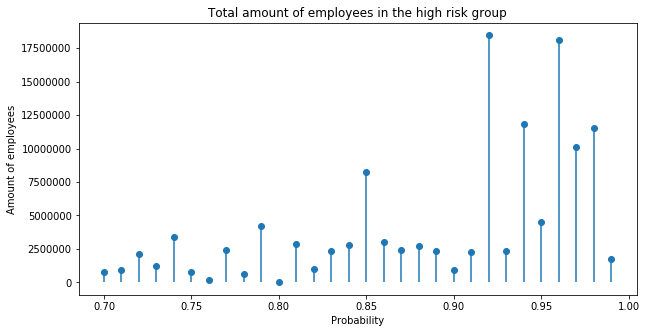

In [36]:
# lollipop chart showing the amount of affected people from the high risk group

fig, ax = plt.subplots(figsize=(10,5))
peopleByProbability = high_risk.groupby(['Probability']).sum()[['sum_people']].reset_index()
peopleByProbability['Probability']


plt.stem(peopleByProbability['Probability'], peopleByProbability['sum_people'], basefmt=' ', markerfmt='o', use_line_collection=True)
plt.plot

# remove weird numbers
plt.ticklabel_format(style='plain')

plt.xlabel('Probability')
plt.ylabel('Amount of employees')
plt.title('Total amount of employees in the high risk group')
print('')


# plt.savefig('lollipop_high_risk.png')

In [37]:
# get clean dataset with the columns needed for visualizations
clean_merged_salary_and_jobs = merged_salary_and_jobs.loc[:, ['SOC', 'Probability', 'Occupation', 'A_MEAN', 'sum_people', 'risk_groups']]
clean_merged_salary_and_jobs.head()

,SOC,Probability,Occupation,A_MEAN,sum_people,risk_groups
0,11-1011,0.015,Chief Executives,200140,223270,Low Risk
1,11-1021,0.160,General and Operations Managers,123880,2188870,Low Risk
2,11-2011,0.039,Advertising and Promotions Managers,133090,28080,Low Risk
3,11-2021,0.014,Marketing Managers,147240,205900,Low Risk
4,11-2022,0.013,Sales Managers,140320,365250,Low Risk


In [38]:
# round floats (probability)
clean_merged_salary_and_jobs.Probability = clean_merged_salary_and_jobs.Probability.round(3)

In [39]:
# extract only columns to be used
clean_merged_salary_and_jobs.columns = ['job_soc_code', 'probability', 'occupation', 'annual_mean' ,'sum_people', 'risk_groups']
clean_merged_salary_and_jobs.head(5)

,job_soc_code,probability,occupation,annual_mean,sum_people,risk_groups
0,11-1011,0.015,Chief Executives,200140,223270,Low Risk
1,11-1021,0.160,General and Operations Managers,123880,2188870,Low Risk
2,11-2011,0.039,Advertising and Promotions Managers,133090,28080,Low Risk
3,11-2021,0.014,Marketing Managers,147240,205900,Low Risk
4,11-2022,0.013,Sales Managers,140320,365250,Low Risk


In [40]:
# export whole data and high_risk data to csv
# clean_merged_salary_and_jobs.to_csv(r'clean_data/clean_salary_and_jobs.csv', index=False)
#high_risk.to_csv(r'../clean_data/high_risk.csv')

In [41]:
# export whole data and high_risk data to json
# clean_merged_salary_and_jobs.to_json(r'../clean_data/merged_salary_and_jobs.json', orient='records')
# high_risk.to_json(r'../clean_data/high_risk.json', orient='records')